# 사전 훈련된 컨브넷 사용하기

일반적으로 많은 데이터를 구하기는 쉽지않다.

작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이라는 얘기다.

이때 작은 데이터로 학습시 매우 효과적인 방법은 **`사전 훈련된 네트워크`**를 사용하는 것.  

**`사전 훈련된 네트워크`**는 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크다.  

케라스에서는 이미지넷 데이터로 훈련된 모델을 제공한다. 아래에는 케라스에서 제공하는 모델들이다.  

- Xception
- InceptionV3
- ResNet50
- VGG16
- VGG19
- MobileNet 

원본 데이터셋이 충분히 크고 일반적이라면 사전 훈련된 네트워크에 의해 학습된 특성의 계층 구조는 일반적인 모델로 활용 가능하다 할 수 있습니다.  

새로운 만들 모델이 원래 작업과 완전히 다르다 하더라도 이런 특성은 많은 컴퓨터 비전 문제에 유용합니다.  
ex)
동물이나 생활 용품으로 이루어진 ImageNet 데이터셋에 네트워크를 훈련한다.  
그다음 이 네트워크를 이미지에서 가구 아이템을 식별하는 용도로 사용할 수 있다.  
학습된 특성을 활용하는 유연성은 이전의 많은 얕은 학습 방법과 비교했을 때 **딥러닝의 핵심 장점**이다.  
이런 방식으로 작은 데이터셋을 가진 문제에도 딥러닝이 효율적으로 작동할 수 있다.


책의 예제에서는 (1.4백만 개의 레이블된 이미지와 1,000개의 클래스로 이루어진) ImageNet 데이터셋에서 훈련된 대규모 컨브넷을 사용해 본다.  
ImageNet 데이터셋은 다양한 종의 강아지와 고양이를 포함해 많은 동물들을 포함하고 있습니다.


`캐런 시몬연`과 `앤드류 지서먼`이 2014년에 개발한 **VGG16** 구조 사용  
**VGG16**
VGG16은 간단하고 ImageNet 데이터셋에 널리 사용되는 컨브넷  
VGG16은 조금 오래되었고 최고 수준의 성능에는 못미치며 최근의 다른 모델보다는 조금 무겁다.  
하지만 모델구조가 지금까지의 예제와 비슷해서 새로운 개념을 도입하지 않고 이해하기 쉽기 때문에 선택했다고함.  

컴퓨터 비전을 위해 딥러닝을 계속 공부하다보면 이런 모델 이름을 자주 만나게 될 것이다.  
추후 등장한 모델들의 역사를 살펴봅시다.  

사전훈련된 모델을 사용하는 방법은 크게 두가지가 있습니다.  
 - 특성 추출
 - 미세 조정  
  
이 두 가지를 모두 다루어 본다  

## 특성 추출 (Feature Extractor)


특성 추출은 사전에 학습된 네트워크의 표현을 사용해 새로운 샘플에서 흥미로운 특성을 뽑아내는 것.  
이 특성을 사용하여 새로운 분류기를 처음부터 훈련한다.  

컨브넷은 이미지 분류를 위해 두 부분으로 구성.  

연속된 (합성곱- 풀링 층 - ...) - 완전 연결 분류기   

첫 번째 부분을 모델의 합성곱 기반층(convolutional base)이라고 부르겠습니다.  
컨브넷의 경우 특성 추출은 사전에 훈련된 네트워크의 합성곱 기반층을 선택해 새로운 데이터를 통과시키고 그 출력으로 새로운 분류기를 훈련합니다.

**의문점**  
* 왜 합성곱 층만 재사용할까요?  
* 완전 연결 분류기도 재사용할 수 있을까요?   

이 책에선 일반적으로 권장하지 않는다고 한다.  
합성곱 층에 의해 학습된 표현이 더 일반적이기 때문에 재사용이 가능하다.  

분류기는 해당 문제를 풀기위해 만들었기에 덜 일반적인 것이다. (클래스 집합에 특화)   

    분류기는 전체 사진에 어떤 클래스가 존재할 확률에 관한 정보를 담고 있음.  
    완전 연결 층에서 찾은 표현은 더 이상 입력 이미지에 있는 객체의 위치 정보가 없음.  
    완전 연결 층들은 공간 개념을 제거하지만 합성곱의 특성 맵은 객체의 위치를 고려.  
    객체의 위치가 중요한 문제라면 완전 연결 층에서 만든 특성은 크게 쓸모가 없음.

- 특성 맵: 사진(데이터)에 대한 일반적인 컨셉의 존재 여부를 기록한 맵  



특정 합성곱 층에서 추출한 표현의 일반성(그리고 재사용성)의 수준은 모델에 있는 층의 깊이에 좌우된다.  

모델의 하위 층은 (에지, 색깔, 질감 등과 같이) 지역적이고 매우 일반적인 특성 맵을 추출. 
모델의 상위 층은 ('강아지 눈'이나 '고양이 귀'와 같이) 좀 더 추상적인 개념을 추출.  

새로운 데이터셋이 원본 모델이 훈련한 데이터셋과 많이 다르다면 전체 합성곱 기반층을 사용하는 것보다는 모델의 하위 층 몇 개만 특성 추출에 사용하는 것이 좋다.  

ImageNet의 클래스 집합에는 여러 종류의 강아지와 고양이를 포함하고 있습니다.  
원본 모델의 완전 연결 층에 있는 정보를 재사용하는 것이 도움이 될 것 같습니다.  

새로운 문제의 클래스가 원본 모델의 클래스 집합과 **겹치지 않는** 좀 더 일반적인 경우를 다루기 위해서 완전 연결 층은 배제하고 진행.  

예제)   

사전 학습된 모델 :ImageNet 데이터셋에 훈련된 **VGG16** 네트워크  
사용할 층 : **합성곱 기반층**을 사용   
분류 : 강아지 vs. 고양이 분류기를 훈련  

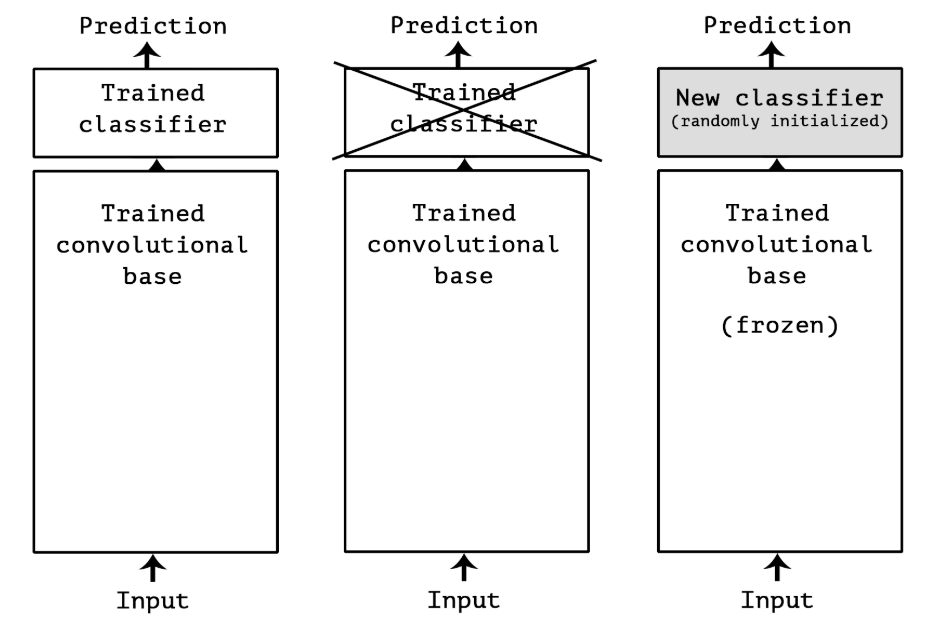

**VGG 모델 생성**

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.5'

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 135s 2us/step


VGG16 함수에 세 개의 매개변수를 전달합니다:

* weights : 모델을 초기화할 가중치 체크포인트를 지정.
* include_top : 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정.  
    기본값은 ImageNet의 1,000개의 클래스에 대응되는 완전 연결 분류기를 포함  
    별도의 (강아지와 고양이 두 개의 클래스를 구분하는) 완전 연결 층을 추가하려고 하므로 이를 포함시키지 않습니다.  
    
* input_shape: 네트워크에 주입할 이미지 텐서의 크기.(옵션)  
    이 값을 지정하지 않으면 네트워크가 어떤 크기의 입력도 처리할 수 있다.

VGG16 합성곱 기반층의 자세한 구조를 살펴보자.  

In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

최종 특성 맵의 크기 : `(4, 4, 512)`  

이 지점에서 두 가지 방식이 가능하다고 한다.

* 1. 새로운 데이터셋에서 합성곱 기반층을 실행하고 출력을 넘파이 배열로 디스크에 저장.  
  2. 독립된 완전 연결 분류기에 입력으로 사용. (합성곱 연산은 전체 과정 중에서 가장 비싼 부분)  
  3. 모든 입력 이미지에 대해 합성곱 기반층을 한 번만 실행하면 되기 때문에 빠르고 비용이 적게 듬.   
  4. 이 기법에는 **데이터 증식**을 사용할 수 없습니다.    
  
  
* 1. 준비한 모델(`conv_base`) 위에 `Dense` 층을 쌓아 확장.  
  2. 입력 데이터에서 엔드 투 엔드로 전체 모델을 실행.  
  3. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반층을 통과하기 때문에 데이터 증식을 사용할 수 있다.
  4. 하지만 첫 번째 방식보다 훨씬 비용이 많이 든다.

----

두 가지 모두 실습해 보자.

#### 첫번째 방식  

`conv_base`에 데이터를 주입하고 출력을 기록.  
이 출력을 새로운 모델의 입력으로 사용.

`ImageDataGenerator`를 사용해 이미지와 레이블을 넘파이 배열로 추출.    
`conv_base` 모델의 `predict` 메서드를 호출하여 이 이미지에서 특성을 추출.

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 모든 이미지를 한 번씩 처리하고 중지
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


추출된 특성의 크기는 `(samples, 4, 4, 512)`   
완전 연결 분류기에 주입하기 위해서 먼저 `(samples, 8192)` 크기로 조정.  

그러고 나서 완전 연결 분류기를 정의하고 저장된 데이터와 레이블을 사용해 훈련 시작.  
(규제를 위해 드롭아웃을 사용)  

In [5]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 342us/step - loss: 0.6056 - acc: 0.6585 - val_loss: 0.4532 - val_acc: 0.8340
Epoch 2/30
2000/2000 [==============================] - 1s 268us/step - loss: 0.4391 - acc: 0.7985 - val_loss: 0.3958 - val_acc: 0.8200
Epoch 3/30
2000/2000 [==============================] - 1s 267us/step - loss: 0.3519 - acc: 0.8525 - val_loss: 0.3364 - val_acc: 0.8740
Epoch 4/30
2000/2000 [==============================] - 1s 267us/step - loss: 0.3258 - acc: 0.8590 - val_loss: 0.3101 - val_acc: 0.8850
Epoch 5/30
2000/2000 [==============================] - 1s 267us/step - loss: 0.2880 - acc: 0.8895 - val_loss: 0.2925 - val_acc: 0.8810
Epoch 6/30
2000/2000 [==============================] - 1s 267us/step - loss: 0.2704 - acc: 0.8920 - val_loss: 0.2819 - val_acc: 0.8840
Epoch 7/30
2000/2000 [==============================] - 1s 267us/step - loss: 0.2445 - acc: 0.9035 - val_loss: 0.2673 - val_acc: 0.8920


두 개의 `Dense` 층만 처리하면 되기 때문에 훈련이 매우 빠르다!!!!   
CPU를 사용하더라도 한 에포크에 걸리는 시간이 1초도 안됩니다.  

##### 정확도 손실 확인  


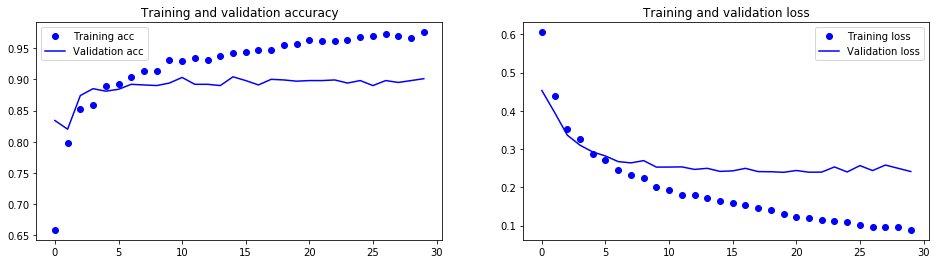

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**검증 정확도 : 약 90%**  
확실히... 좋다..
하지만 그래프를 보면  드롭아웃을 많이 썼지만 훈련이 시작하면서 거의 바로 과대적합되고 있다. 

작은 이미지 데이터셋에서는 과대적합을 막기 위해 **필수**적인 데이터 증식을 사용하지 않았기 때문이다.  


#### 두번째 방식  

이 방법은 훨씬 느리고 비용이 많이 들지만 훈련하는 동안 데이터 증식 기법을 사용할 수 있음.  

`conv_base` 모델을 확장하고 입력 데이터를 사용해 엔드 투 엔드로 실행.


*이 기법은 연산 비용이 크기 때문에 GPU를 사용할 수 있을 때 시도하기를 권장.  
CPU에서는 적용하기 매우 힘들다. GPU를 사용할 수 없다면 첫 번째 방법까지만 실습하세요..*  

모델은 층과 동일하게 작동하므로 층을 추가하듯이 `Sequential` 모델에 (`conv_base` 같은) 다른 모델을 추가할 수 있음.  

모델을 생성하고 모델구조를 확인해보자.

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


위와같이,  
VGG16의 합성곱 기반층은 14,714,688개의 매우 많은 파라미터를 가지고 있다.  
합성곱 기반층 위에 추가한 분류기는 2백만 개의 파라미터를 가진다.  

모델을 컴파일하고 훈련하기 전에 합성곱 기반층을 동결해야 한다.(**중요**)  
**동결**한다는 것은 훈련하는 동안 가중치가 업데이트되지 않도록 막는다는 뜻입니다.  
동결하지 않으면 사전에 학습된 표현이 훈련하는 동안 수정되어 버린다.  

`Dense` 층은 랜덤하게 초기화되었기 때문에 매우 큰 가중치 업데이트 값이 네트워크에 전파된다.  
사전에 학습된 표현을 크게 훼손하게 되는 것이다.  

케라스에서는 **`trainable`** 속성을 `False`로 설정하면 동결된다.  

In [10]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [11]:
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


이렇게 하면 추가한 두 개의 Dense 층의 가중치만 훈련하게 된다.  
층마다 두 개씩(가중치 행렬과 편향 벡터) 총 네 개의 텐서가 훈련되기에 가중치 수는 **4**이다.  
변경된 사항을 적용하려면 모델을 컴파일해야한다.  
trainable 속성을 변경하면 반드시 모델을 다시 컴파일해야 한다.  

이제 앞의 예제에서 사용했던 데이터 증식을 사용하여 모델을 훈련해 보자.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 15s - loss: 0.5516 - acc: 0.7220 - val_loss: 0.4193 - val_acc: 0.8380
Epoch 2/30
 - 13s - loss: 0.4018 - acc: 0.8435 - val_loss: 0.3370 - val_acc: 0.8780
Epoch 3/30
 - 13s - loss: 0.3484 - acc: 0.8625 - val_loss: 0.3006 - val_acc: 0.8870
Epoch 4/30
 - 13s - loss: 0.3160 - acc: 0.8760 - val_loss: 0.2847 - val_acc: 0.8870
Epoch 5/30
 - 14s - loss: 0.2922 - acc: 0.8870 - val_loss: 0.2686 - val_acc: 0.8960
Epoch 6/30
 - 13s - loss: 0.2843 - acc: 0.8900 - val_loss: 0.2592 - val_acc: 0.8950
Epoch 7/30
 - 13s - loss: 0.2736 - acc: 0.8855 - val_loss: 0.2527 - val_acc: 0.8980
Epoch 8/30
 - 13s - loss: 0.2623 - acc: 0.8945 - val_loss: 0.2496 - val_acc: 0.8980
Epoch 9/30
 - 14s - loss: 0.2581 - acc: 0.8925 - val_loss: 0.2465 - val_acc: 0.9000
Epoch 10/30
 - 14s - loss: 0.2521 - acc: 0.9040 - val_loss: 0.2527 - val_acc: 0.8930
Epoch 11/30
 - 13s - loss: 0.2419 - acc: 0.9000 - val_loss: 0.2397 - val_ac

모델 저장은 항상 필수...ㅎ

In [13]:
model.save('models/cats_and_dogs_small_3.h5')

결과를 봐봅시다

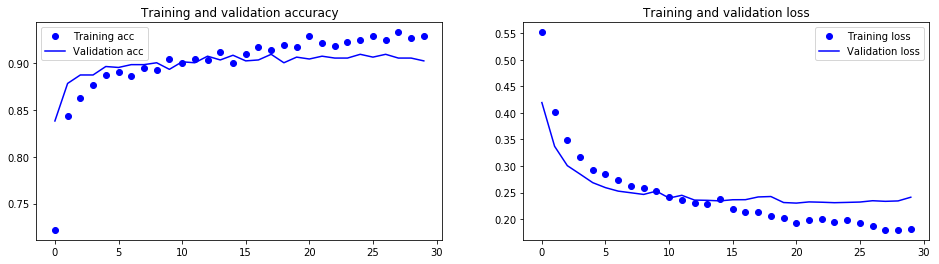

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(122)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증 정확도가 이전과 비슷하지만 처음부터 훈련시킨 소규모 컨브넷보다 과대적합이 줄었다.

## 미세 조정 (Fine Tuning)

모델을 재사용하는 데 널리 사용되는 또 하나의 기법은 특성 추출을 보완하는 미세 조정에 대해 알아보자.  

**미세 조정**은 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 **동결에서 해제**하고 모델에 새로 추가한 층(여긴 완전 연결 분류기)과 함께 훈련하는 것이다.  

주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세 조정이라고 부른다고 한다.  

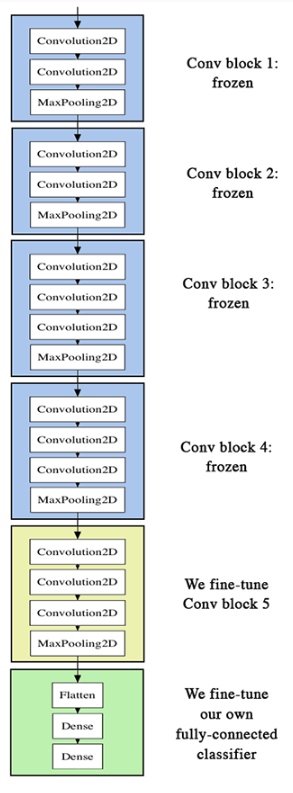

랜덤하게 초기화된 상단 분류기를 훈련하기 위해 VGG16의 합성곱 기반층을 동결해야 한다고 했다.  
`분류기가 훈련된 후`에 합성곱 기반의 상위 층을 미세 조정할 수 있음.  
미리 훈련되지 않으면 훈련되는 동안 너무 큰 오차 신호가 네트워크에 전파되기 때문이다.  
이는 사전에 학습한 표현들을 망가뜨리게 된다.(동결을 해제한 네트워크만)    

미세 조정하는 단계는 아래와 같다.  

1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가.
2. 기반 네트워크를 동결.
3. 새로 추가한 네트워크를 훈련.
4. 기반 네트워크에서 일부 층의 동결을 해제.
5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련.

1~3 단계는 **특성 추출**을 할 때 이미 진행했습니다.  

네 번째 단계부터 실습해 보자.  
`conv_base`의 동결을 해제하고 개별 층을 동결한다.

합성곱층의 구조를 다시한번 보자.  

In [15]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

마지막 세 개의 합성곱 층을 미세 조정해본다.  
즉, `block4_pool`까지 모든 층은 동결되고 `block5_conv1`, `block5_conv2`, `block5_conv3` 층은 학습 대상이 됩니다.

```
왜 더 많은 층을 미세 조정하지 않을까?    
왜 전체 합성곱 기반층을 미세 조정하지 않을까?  
아래의 사항을 고려해야 한다.

 - 합성곱 기반층에 있는 하위 층들은 좀 더 일반적이고 재사용 가능한 특성들을 인코딩한다. 
 - 상위 층은 좀 더 특화된 특성을 인코딩한다.  
 
   새로운 문제에 재활용하도록 수정이 필요한 것은 구체적인 특성이므로 이들을 미세 조정하는 것이다. 
   하위 층으로 갈수록 미세 조정에 대한 효과가 감소합니다.  
   
 - 훈련해야 할 파라미터가 많을수록 과대적합의 위험이 커진다. 
 - 합성곱 기반층은 1천 5백만 개의 파라미터를 가지고 있다. 작은 데이터셋으로 전부 훈련하려고 하면 매우 위험하다.

그러므로 학습데이터가 적은 경우 합성곱 기반층에서 최상위 두 세개의 층만 미세 조정하는 것이 좋다.  
```
 
예제 코드에 이어서 미세 조정을 설정해 보자.  

In [16]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

**학습률을 낮춘** RMSProp 옵티마이저를 사용.  
학습률을 낮추는 이유는 미세 조정하는 세 개의 층에서 학습된 표현을 조금씩만 튜닝하기 위해서다.    
변경량이 너무 크면 사전 훈련된 표현에 나쁜 영향을 끼칠 수 있다.  

컴파일 해보자.

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 15s 153ms/step - loss: 0.1980 - acc: 0.9175 - val_loss: 0.2250 - val_acc: 0.9100
Epoch 2/100
100/100 [==============================] - 14s 135ms/step - loss: 0.1658 - acc: 0.9360 - val_loss: 0.2165 - val_acc: 0.9230
Epoch 3/100
100/100 [==============================] - 13s 134ms/step - loss: 0.1364 - acc: 0.9465 - val_loss: 0.2115 - val_acc: 0.9300
Epoch 4/100
100/100 [==============================] - 13s 135ms/step - loss: 0.1237 - acc: 0.9460 - val_loss: 0.2046 - val_acc: 0.9250
Epoch 5/100
100/100 [==============================] - 14s 140ms/step - loss: 0.1041 - acc: 0.9610 - val_loss: 0.2061 - val_acc: 0.9310
Epoch 6/100
100/100 [==============================] - 13s 134ms/step - loss: 0.0945 - acc: 0.9640 - val_loss: 0.2024 - val_acc: 0.9280
Epoch 7/100
100/100 [==============================] - 13s 134ms/step - loss: 0.0781 - acc: 0.9670 - val_loss: 0.2538 - val_acc: 0.9120
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 14s 139ms/step - loss: 0.0043 - acc: 0.9985 - val_loss: 0.3153 - val_acc: 0.9380
Epoch 62/100
100/100 [==============================] - 15s 149ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.3409 - val_acc: 0.9360
Epoch 63/100
100/100 [==============================] - 14s 140ms/step - loss: 0.0024 - acc: 0.9990 - val_loss: 0.3459 - val_acc: 0.9340
Epoch 64/100
100/100 [==============================] - 13s 134ms/step - loss: 7.3367e-04 - acc: 0.9995 - val_loss: 0.3627 - val_acc: 0.9340
Epoch 65/100
100/100 [==============================] - 13s 135ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.3882 - val_acc: 0.9260
Epoch 66/100
100/100 [==============================] - 15s 145ms/step - loss: 0.0065 - acc: 0.9975 - val_loss: 0.3279 - val_acc: 0.9360
Epoch 67/100
100/100 [==============================] - 14s 139ms/step - loss: 0.0036 - acc: 0.9985 - val_loss: 0.3778 - val_acc: 0.9300
Epoch 68/100
100/100 [===============

모델을 저장해둡시다

In [18]:
model.save('models/cats_and_dogs_small_4.h5')

결과를 한번 보죠

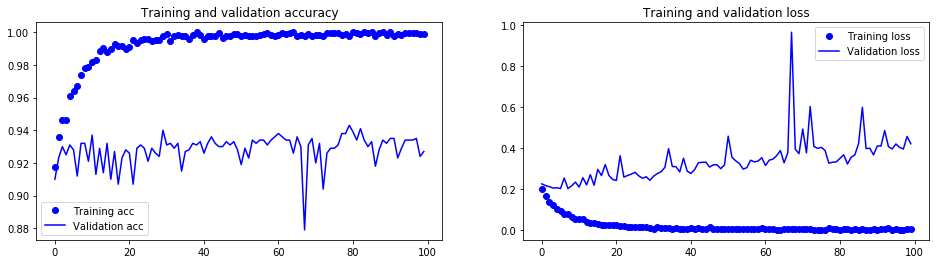

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize= (16, 4))

plt.subplot(121)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

그래프가 불규칙하다... ㅡ,.ㅡ;;  
앞에서 그래프를 보기 쉽게하기 위해 지수 이동 평균으로 정확도와 손실 값을 부드럽게 표현하는 법을 보았다.

다음은 **지수 이동 평균**을 구하기 위한 간단한 함수입니다.  
적용하여 결과를 확인해보자.  

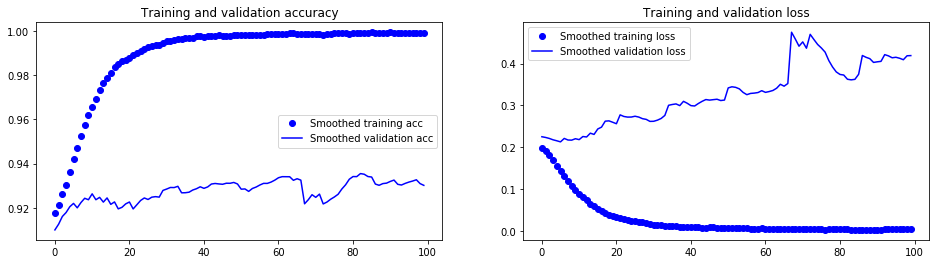

In [20]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.figure(figsize= (16, 4))

plt.subplot(121)
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(122)
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증 정확도 곡선이 훨씬 부드럽다. 

정확도가 약 1% 향상했다.!!  
손실 곡선은 사실 악화되었다. (ㅠ_ㅠ)  

```
손실히 감소되지 않았는데 어떻게 정확도가 안정되거나 향상될 수 있었을까?
답은 간단하다.  

그래프는 개별적인 손실 값의 평균을 그린 것이다.  
하지만 정확도에 영향을 미치는 것은 손실 값의 분포이지 평균이 아니다.    
정확도는 모델이 예측한 클래스 확률이 어떤 임계값을 넘었는지에 대한 결과이기 때문이다.   
모델이 더 향상더라도 평균 손실에 반영되지 않을 수 있는 것이다.

```

이제 마지막으로 테스트 데이터에서 이 모델을 평가해보자.

In [21]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9319999933242797


93%의 테스트 정확도를 얻었다.  
이 데이터셋을 사용한 원래 캐글 경연 대회에서 꽤 높은 순위다.  
2,000개의 훈련 데이터로 달성했기에 의미있다고 볼 수 있다.(최신 딥러닝 기법덕이다.)  

## 정리

지금까지 배운걸 정리해보자.  

* 컨브넷은 컴퓨터 비전 작업에 가장 뛰어난 머신 러닝 모델이다. 아주 작은 데이터셋에서도 처음부터 훈련해서 괜찮은 성능을 낼 수 있다.
* 작은 데이터셋에서는 **과대적합**이 큰 문제다. **데이터 증식**은 이미지 데이터를 다룰 때 과대적합을 막을 수 있는 강력한 방법이다.
* 특성 추출 방식으로 새로운 데이터셋에 기존의 컨브넷을 쉽게 재사용할 수 있다. 작은 이미지 데이터셋으로 작업할 때 효과적인 기법이다.
* 특성 추출을 보완하기 위해 미세 조정이 있다. 미세 조정은 기존 모델에서 사전에 학습한 표현의 일부를 새로운 문제에 적응시키는 것이다. 이 기법은 조금 더 성능을 끌어올린다.

이미지 분류 문제에서 특히 작은 데이터셋을 다루기 위한 좋은 기법들을 배웠다.  

5장이 참 길었던것같다.    

다음 장 부터가 RNN이다. 시작해보자... 후...